In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data.

In [59]:
df = pd.read_csv('Car_Tyres_Dataset.csv')

In [60]:
df.head()

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,"3,255","3,255",5.0
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,"3,406","3,406",4.0
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,"3,490","4,319",4.5
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,"4,484","4,244",NaN
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,"3,025","3,025",4.2


# Gathering information about data.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           4350 non-null   object 
 1   Model           4350 non-null   object 
 2   Submodel        4350 non-null   object 
 3   Tyre Brand      4350 non-null   object 
 4   Serial No.      4350 non-null   object 
 5   Type            4350 non-null   object 
 6   Load Index      4350 non-null   int64  
 7   Size            4350 non-null   object 
 8   Selling Price   4350 non-null   object 
 9   Original Price  4350 non-null   object 
 10  Rating          2248 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 374.0+ KB


Selling Prince and Original Price is in object form, but it should be in int64.
So, we need to convert datatype of these 2 columns.

In [62]:
df['Selling Price'] = df['Selling Price'].str.replace(',','').astype(int)
df['Original Price'] = df['Original Price'].str.replace(',','').astype(int)

In [63]:
# Now again checking the Dtype of all columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           4350 non-null   object 
 1   Model           4350 non-null   object 
 2   Submodel        4350 non-null   object 
 3   Tyre Brand      4350 non-null   object 
 4   Serial No.      4350 non-null   object 
 5   Type            4350 non-null   object 
 6   Load Index      4350 non-null   int64  
 7   Size            4350 non-null   object 
 8   Selling Price   4350 non-null   int32  
 9   Original Price  4350 non-null   int32  
 10  Rating          2248 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 340.0+ KB


# Checking the statistical information of the data set for numerical columns.

In [64]:
df.describe()

,Load Index,Selling Price,Original Price,Rating
count,4350.000000,4350.000000,4350.000000,2248.000000
mean,84.101609,4724.982989,4762.234943,4.297598
std,6.716769,1848.303937,1869.111942,0.698433
min,69.000000,2248.000000,2248.000000,1.900000
25%,79.000000,3400.000000,3401.250000,4.000000
50%,86.000000,4300.000000,4319.000000,4.300000
75%,88.000000,5594.000000,5594.000000,5.000000
max,106.000000,20257.000000,20257.000000,5.000000


# Checking for duplicate values in the data set.

In [65]:
df.duplicated().sum()

134

In [66]:
# Droping all duplicate values.
df.drop_duplicates(inplace=True)

In [67]:
df.duplicated().sum()

0

# Checking for null values.

In [68]:
df.isnull().sum()

Brand                0
Model                0
Submodel             0
Tyre Brand           0
Serial No.           0
Type                 0
Load Index           0
Size                 0
Selling Price        0
Original Price       0
Rating            2032
dtype: int64

There are 2032 null values in 'Rating' column. Either we can remove these values, but removing such huge amount of rows is not good for analysis part. We can fill these null values with 0 or mean value of column. So, for better analysis I am going to fill these null values with mean value.

In [69]:
mean_value = round(df['Rating'].mean())
mean_value

4

In [70]:
df['Rating'] = df['Rating'].fillna(value=mean_value)

In [71]:
# After filling null values with mean value, lets check data info again.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4216 entries, 0 to 4349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           4216 non-null   object 
 1   Model           4216 non-null   object 
 2   Submodel        4216 non-null   object 
 3   Tyre Brand      4216 non-null   object 
 4   Serial No.      4216 non-null   object 
 5   Type            4216 non-null   object 
 6   Load Index      4216 non-null   int64  
 7   Size            4216 non-null   object 
 8   Selling Price   4216 non-null   int32  
 9   Original Price  4216 non-null   int32  
 10  Rating          4216 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 362.3+ KB


# Product count on the basis of Type.

In [72]:
tyre_type = df['Type'].value_counts().reset_index()
tyre_type.columns = ('Type','Count')
tyre_type

,Type,Count
0,Tubeless,3932
1,Tube,284


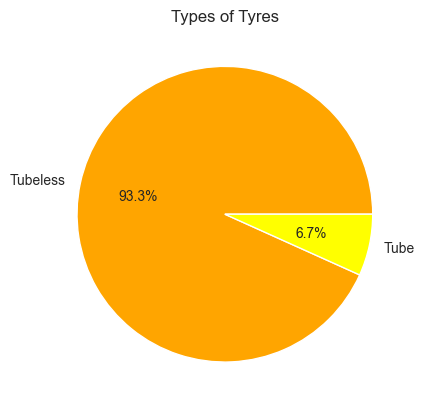

In [73]:
# Visulaising the Tyre Type.
x = tyre_type['Type']
y = tyre_type['Count']
plt.pie(y,labels=x,autopct='%1.1f%%',colors=('orange','yellow'))
plt.title('Types of Tyres')
plt.show()

# Major brands in the market.

In [74]:
brands = df['Tyre Brand'].value_counts().reset_index()
brands.columns = ('Tyre Brand','Count')
brands

,Tyre Brand,Count
0,BridgeStone,593
1,GoodYear,487
2,CEAT,435
3,JKTyre,434
4,Apollo,386
5,Yokohama,362
6,Continental,331
7,Falken,259
8,MRF,259
9,Firestone,167


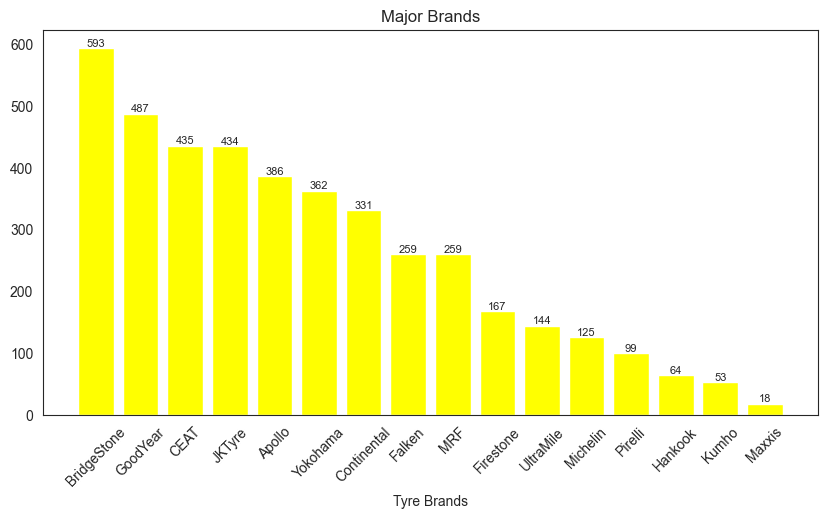

In [75]:
x = brands['Tyre Brand']
y = brands['Count']
plt.figure(figsize=(10,5))
plt.title('Major Brands')
plt.bar(x,y,color='yellow')
plt.xlabel('Tyre Brands')
plt.xticks(rotation=45)
for i in range(len(x)):
    plt.text(x[i],y[i],f'{y[i]}',ha='center',va='bottom',fontsize=8)
plt.show()

Top 5 brands with most tyre model with tyre types.

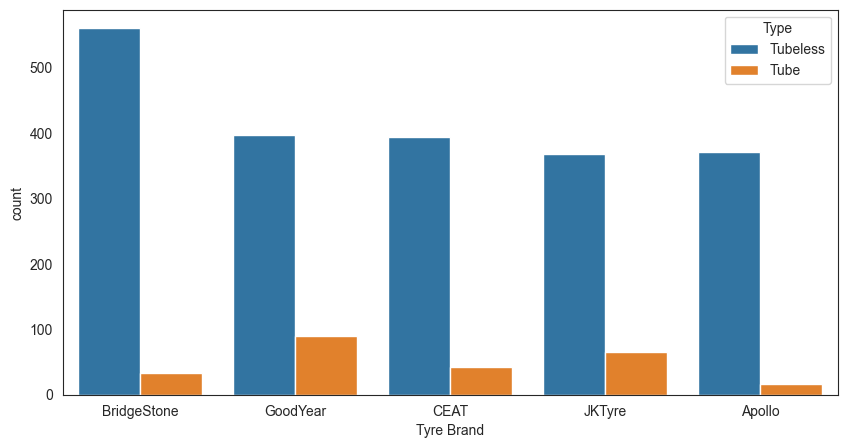

In [95]:
sns.set_style('white')
plt.figure(figsize=(10,5))
sns.countplot(x='Tyre Brand',hue='Type',data=df,order=df['Tyre Brand'].value_counts().iloc[:5].index)
plt.show()

# Car model has the highest number of typre models.

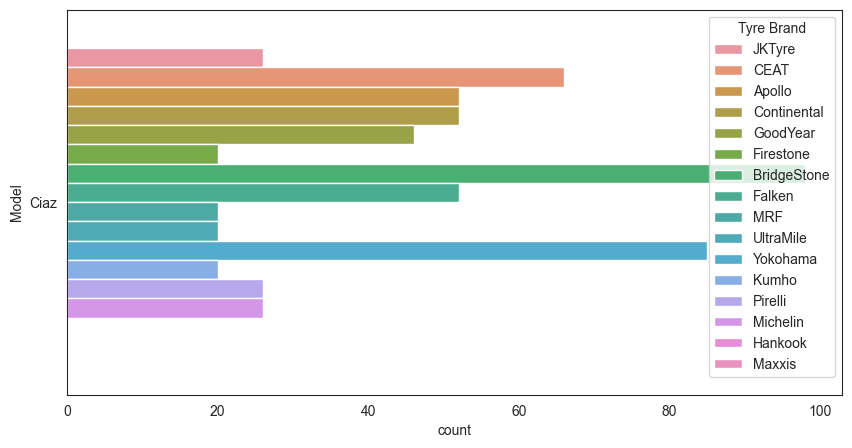

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(y='Model',hue='Tyre Brand',data=df,order=df['Model'].value_counts().iloc[:1].index)
plt.show()

# Tyre Brands with maximum ratings.

In [78]:
ratings = df.groupby('Tyre Brand')['Rating'].mean().sort_values(ascending=False)
ratings = round(ratings,2)
ratings

Tyre Brand
Pirelli        4.55
CEAT           4.33
Apollo         4.21
JKTyre         4.20
BridgeStone    4.19
GoodYear       4.16
Yokohama       4.12
Falken         4.10
Michelin       4.06
Firestone      4.04
MRF            4.02
Hankook        4.00
Kumho          4.00
Maxxis         4.00
Continental    4.00
UltraMile      3.97
Name: Rating, dtype: float64

# Average Selling Price of Tyre Brands.

In [96]:
avg_sp = df.groupby('Tyre Brand')['Selling Price'].mean().apply(np.ceil)
avg_sp = avg_sp.to_frame().reset_index()
avg_sp

,Tyre Brand,Selling Price
0,Apollo,4614.0
1,BridgeStone,5155.0
2,CEAT,4097.0
3,Continental,5218.0
4,Falken,5026.0
5,Firestone,3457.0
6,GoodYear,3968.0
7,Hankook,4937.0
8,JKTyre,3543.0
9,Kumho,4643.0


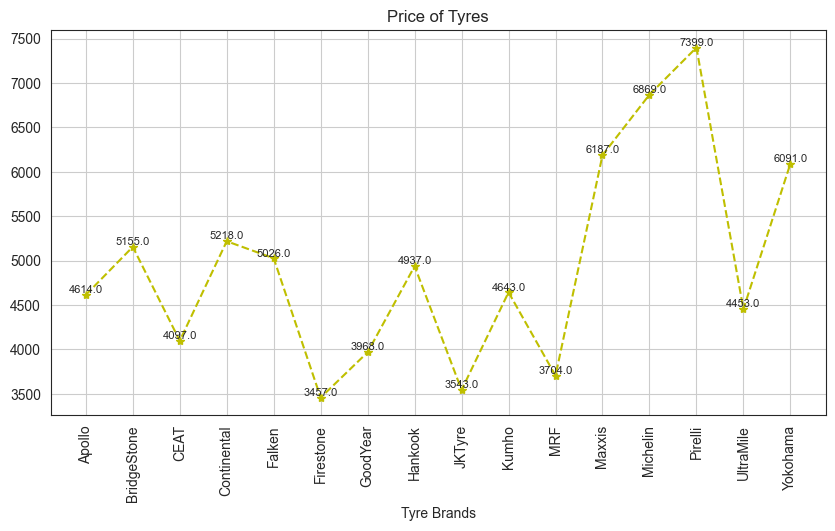

In [99]:
x = avg_sp['Tyre Brand']
y = avg_sp['Selling Price']
plt.figure(figsize=(10,5))
plt.plot(x,y,'*y--')
plt.title('Price of Tyres')
plt.xlabel('Tyre Brands')
plt.grid()
plt.xticks(rotation=90)
for i in range(len(x)):
    plt.text(x[i],y[i],f'{y[i]}',ha='center',va='bottom',fontsize=8)
plt.show()

# Different Sizes of tyres.

In [87]:
tyre_size = df['Size'].value_counts().reset_index()
tyre_size.columns = ('Size','Count')
tyre_size

,Size,Count
0,185/65 R 15,1167
1,165/80 R 14,633
2,145/80 R 12,408
3,155/80 R 13,274
4,165/70 R 14,234
5,155/65 R 13,190
6,205/60 R 16,177
7,195/55 R 16,162
8,215/60 R 16,149
9,145/70 R 13,141


# Different Car models in Maruti.

In [88]:
car_models = df['Model'].value_counts().reset_index()
car_models.columns = ('Model','Count')
car_models

,Model,Count
0,Ciaz,609
1,Ertiga,325
2,Alto,299
3,Swift Dzire,242
4,Alto K10,224
5,Ritz,222
6,Esteem,215
7,Vitara Brezza,206
8,New Swift (2018),198
9,SX4,195


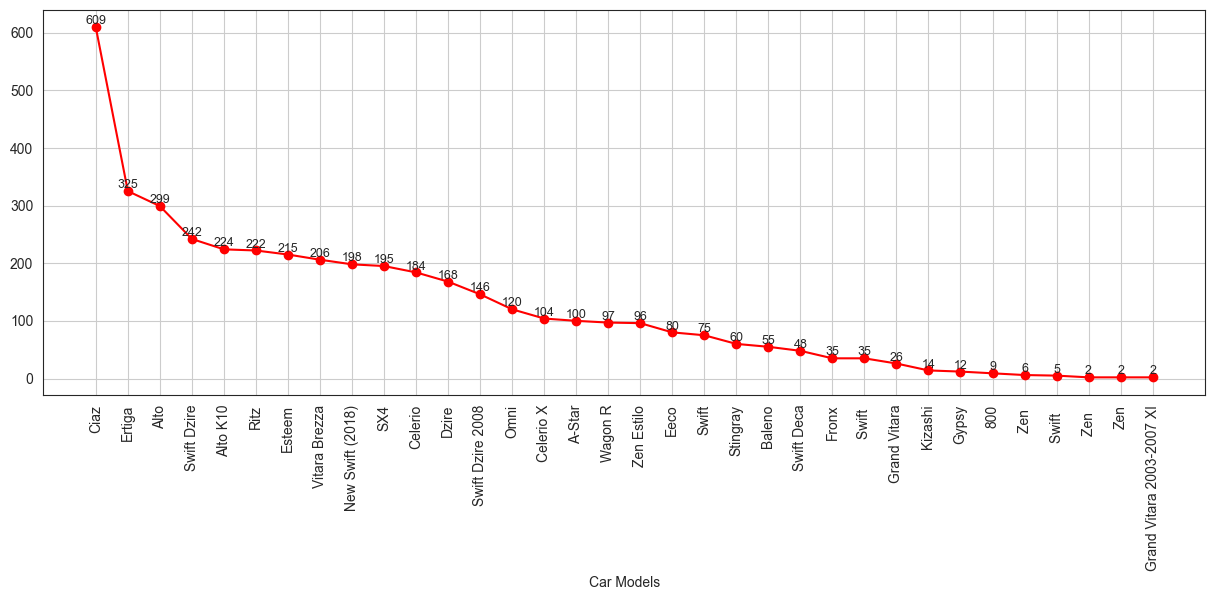

In [115]:
x = car_models['Model']
y = car_models['Count']
plt.figure(figsize=(15,5))
plt.plot(x,y,'or-')
plt.xlabel('Car Models')
plt.xticks(rotation=90)
for i in range(len(x)):
    plt.text(x[i],y[i],f'{y[i]}',ha='center',va='bottom',fontsize=9)
plt.grid()
plt.show()

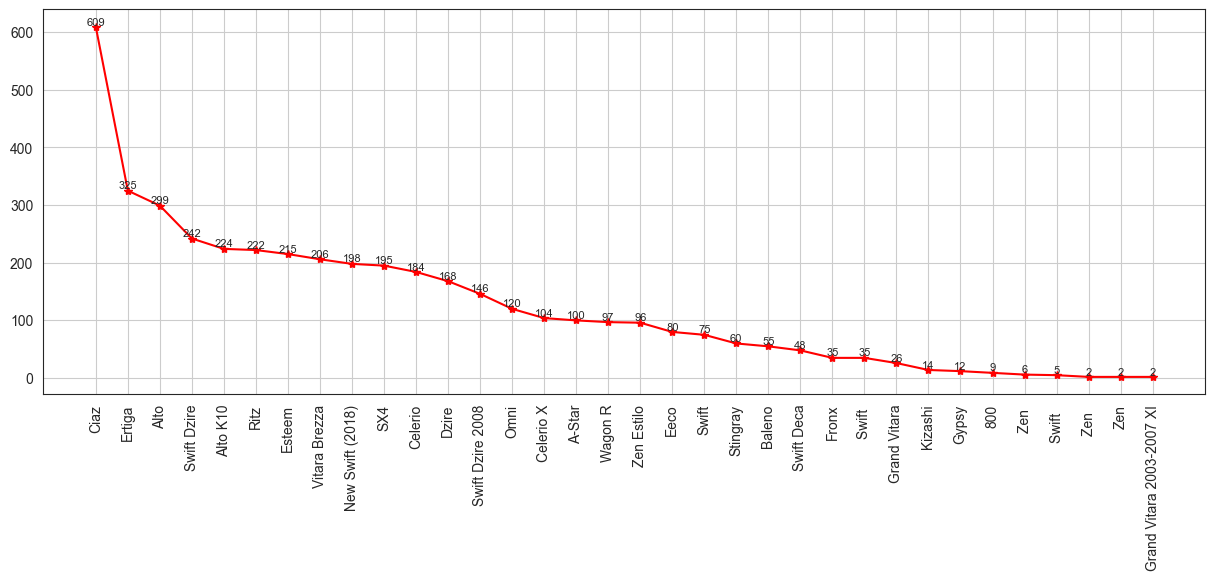

In [110]:
x = car_models['Model']
y = car_models['Count']
plt.figure(figsize=(15,5))
plt.plot(x,y,'*r-')
plt.xticks(rotation='vertical')
for i in range(len(x)):
    plt.text(x[i],y[i],f'{y[i]}',ha='center',va='bottom',fontsize=8)
plt.grid()
plt.show()

# Top 10 Tyre Models Used by Maruti Suzuki.

In [94]:
tyre_model = df['Serial No.'].value_counts().reset_index().head(10)
tyre_model.columns = ('Tyre Model','Quantity')
tyre_model

,Tyre Model,Quantity
0,Milage X3,192
1,Amazer 4G Life,177
2,B-Series B290,176
3,Earth-1 E400,164
4,FR500,163
5,UM 551,136
6,FuelSmart,135
7,Comfort Contact CC6,127
8,Ecopia EP150,115
9,Assurance Duraplus 2,109


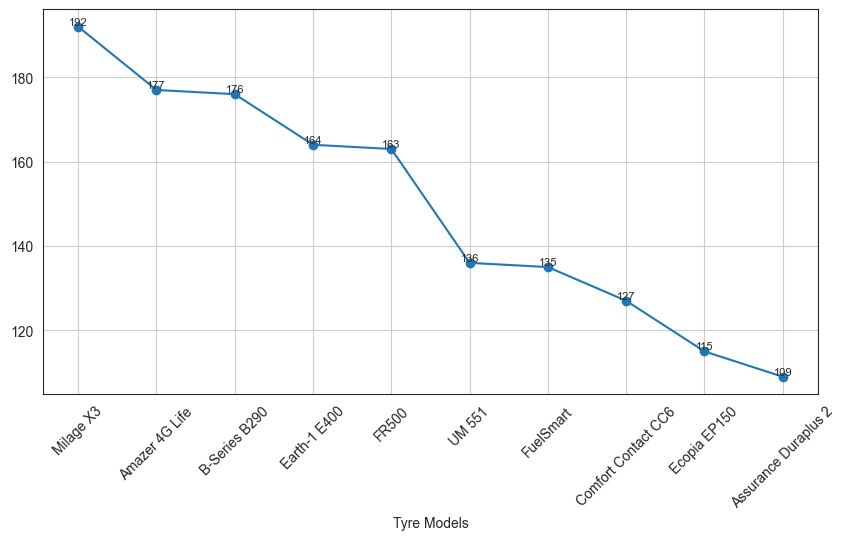

In [107]:
x = tyre_model['Tyre Model']
y = tyre_model['Quantity']
plt.figure(figsize=(10,5))
plt.xlabel('Tyre Models')
plt.plot(x,y,'o-')
plt.xticks(rotation=45)
for i in range(len(x)):
    plt.text(x[i],y[i],f'{y[i]}',ha='center',va='bottom',fontsize=8)
plt.grid()
plt.show()